In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [5]:
#Curve Fitting Guided Problem

In [7]:
#1.1
temps = pd.read_csv("GlobalLandTemperaturesByState.csv")
temps2 = temps[["dt", "AverageTemperature", "State"]]
temps2

,dt,AverageTemperature,State
0,1855-05-01,25.544,Acre
1,1855-06-01,24.228,Acre
2,1855-07-01,24.371,Acre
3,1855-08-01,25.427,Acre
4,1855-09-01,25.675,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [9]:
#1.1
#3
temps2["dt"] = pd.to_datetime(temps2["dt"])
# temps3 = temps2.replace(temps2["dt"], dated)
temps3 = temps2[temps2['dt'].dt.year >= 2000]
temps3
#Source: https://www.kdnuggets.com/2022/12/five-ways-conditional-filtering-pandas.html

/var/folders/07/lcdgz__928sf4m_bkt_nrx3r0000gn/T/ipykernel_44864/3694423911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps2["dt"] = pd.to_datetime(temps2["dt"])


,dt,AverageTemperature,State
1736,2000-01-01,25.934,Acre
1737,2000-02-01,26.102,Acre
1738,2000-03-01,26.107,Acre
1739,2000-04-01,25.952,Acre
1740,2000-05-01,25.832,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [11]:
# temps_2001 = temps3["dt"].loc[dt.date(year = 2001, month = 1, day = 1):dt.date(year = 2013, month = 12, day = 31)]
# temps_2001

In [13]:
#1.1
#4
temps_state = temps3[temps3["State"].isin(["Nebraska", "South Dakota", "Wyoming"])]
temps_state

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [15]:
average_temp = temps_state.groupby("dt")["AverageTemperature"].mean().reset_index()
average_temp

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


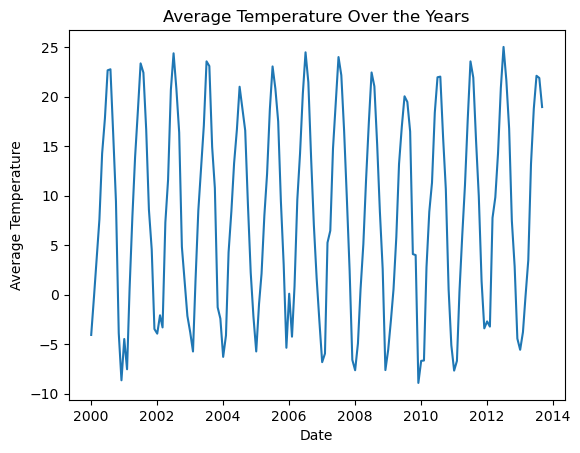

In [17]:
plt.plot(average_temp["dt"], average_temp["AverageTemperature"])
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.title("Average Temperature Over the Years")
plt.show()

In [19]:
average_temp["dt"] = pd.to_numeric(average_temp["dt"])
average_temp

,dt,AverageTemperature
0,946684800000000000,-4.072000
1,949363200000000000,-0.205000
2,951868800000000000,3.642667
3,954547200000000000,7.609667
4,957139200000000000,14.255000
...,...,...
160,1367366400000000000,13.196000
161,1370044800000000000,18.783667
162,1372636800000000000,22.110333
163,1375315200000000000,21.890000


In [21]:
def guess(x, A, w, m, b):
    return A * np.cos(w * x) + m*x + b
maybe_params = np.array([3, np.pi, 0, 0]) #This is a periodic function, and it does not cross the y-axis
maybe_params

array([3.        , 3.14159265, 0.        , 0.        ])

In [23]:
from scipy.optimize import curve_fit
x = average_temp["dt"]
y = average_temp["AverageTemperature"]
popt, pcov = curve_fit(guess, x, y, p0 = maybe_params)
print(popt)
print(pcov)

[-6.16827316e-01  3.14159264e+00  2.04528763e-18  5.95555246e+00]
[[ 2.40403101e+00 -9.39478734e-08  7.84732173e-19 -9.54952374e-01]
 [-9.39478734e-08  7.16755020e-15 -2.96076889e-26  3.76111776e-08]
 [ 7.84732173e-19 -2.96076889e-26  4.03407023e-35 -4.69016291e-17]
 [-9.54952374e-01  3.76111776e-08 -4.69016291e-17  5.51599286e+01]]


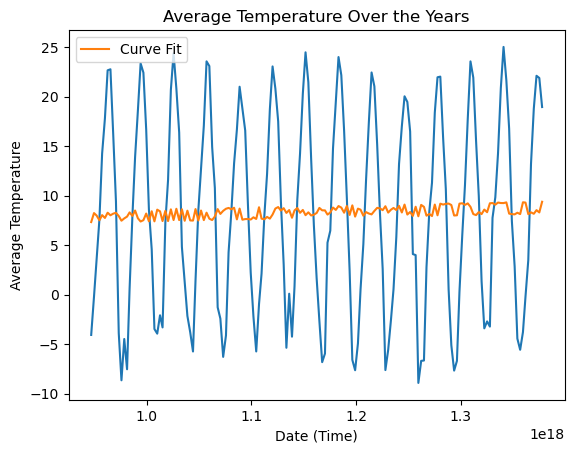

In [25]:
plt.plot(average_temp["dt"], average_temp["AverageTemperature"])
plt.plot(average_temp["dt"], guess(average_temp["dt"], *popt), label = "Curve Fit")
plt.xlabel("Date (Time)")
plt.ylabel("Average Temperature")
plt.title("Average Temperature Over the Years")
plt.legend()
plt.show()

In [27]:
error_from_pcov = np.sqrt(np.diag(pcov))
error_from_pcov

array([1.55049380e+00, 8.46613855e-08, 6.35143309e-18, 7.42697304e+00])

In [47]:
print(f"A = {popt[0]} +- {error_from_pcov[0]}")
print(f"w = {popt[1]} +- {error_from_pcov[1]}")
print(f"m = {popt[2]} +- {error_from_pcov[2]}")
print(f"b = {popt[3]} +- {error_from_pcov[3]}")

A = -0.6168273156720172 +- 1.550493795725593
w = 3.1415926382226953 +- 8.46613855113603e-08
m = 2.045287628865168e-18 +- 6.351433091766721e-18
b = 5.955552464405586 +- 7.42697304131398


In [4]:
from astropy.table import Table

In [6]:
globe = Table.read("global_SFG_MM.dat")

FileNotFoundError: [Errno 2] No such file or directory: 'global_SFG_MM.dat'